Juntando para formar um arquivo só

In [3]:
import pandas as pd

cpu = pd.read_csv('sar_stats-3_cpu.csv', sep=';')
pages = pd.read_csv('sar_stats-3_pages.csv', sep=';')
network = pd.read_csv('sar_stats-3_DEV.csv', sep=';')


In [4]:
cpu_idle = cpu[["timestamp", "%idle"]]
pgfree = pages[['timestamp', 'pgfree/s']]
eth1_rx = network[['timestamp','rxkB/s']]

merged_df = pd.merge(cpu_idle, pgfree, on='timestamp', how='inner')
merged_df = pd.merge(merged_df, eth1_rx, on='timestamp', how='inner')

In [5]:
merged_df

,timestamp,%idle,pgfree/s,rxkB/s
0,2024-10-11 10:30:30 UTC,97.24,6544.0,0.00
1,2024-10-11 10:30:30 UTC,97.24,6544.0,1273.73
2,2024-10-11 10:30:30 UTC,97.24,6544.0,0.00
3,2024-10-11 10:30:31 UTC,97.52,3519.0,0.00
4,2024-10-11 10:30:31 UTC,97.52,3519.0,332.48
...,...,...,...,...
538,2024-10-11 11:01:17 UTC,96.61,1089.0,50.62
539,2024-10-11 11:01:17 UTC,96.61,1089.0,0.00
540,2024-10-11 11:01:18 UTC,98.25,3467.0,0.00
541,2024-10-11 11:01:18 UTC,98.25,3467.0,46.24


In [6]:
cpu_idle = cpu[["timestamp", "%idle"]]
pgfree = pages[['timestamp', 'pgfree/s']]
eth1_rx = network[['timestamp','rxkB/s']]

outer_df = pd.merge(cpu_idle, pgfree, on='timestamp', how='outer')
outer_df = pd.merge(merged_df, eth1_rx, on='timestamp', how='outer')

In [7]:
outer_df

,timestamp,%idle,pgfree/s,rxkB/s_x,rxkB/s_y
0,2024-10-11 10:30:30 UTC,97.24,6544.0,0.00,0.00
1,2024-10-11 10:30:30 UTC,97.24,6544.0,0.00,1273.73
2,2024-10-11 10:30:30 UTC,97.24,6544.0,0.00,0.00
3,2024-10-11 10:30:30 UTC,97.24,6544.0,1273.73,0.00
4,2024-10-11 10:30:30 UTC,97.24,6544.0,1273.73,1273.73
...,...,...,...,...,...
1624,2024-10-11 11:01:18 UTC,98.25,3467.0,46.24,46.24
1625,2024-10-11 11:01:18 UTC,98.25,3467.0,46.24,0.00
1626,2024-10-11 11:01:18 UTC,98.25,3467.0,0.00,0.00
1627,2024-10-11 11:01:18 UTC,98.25,3467.0,0.00,46.24


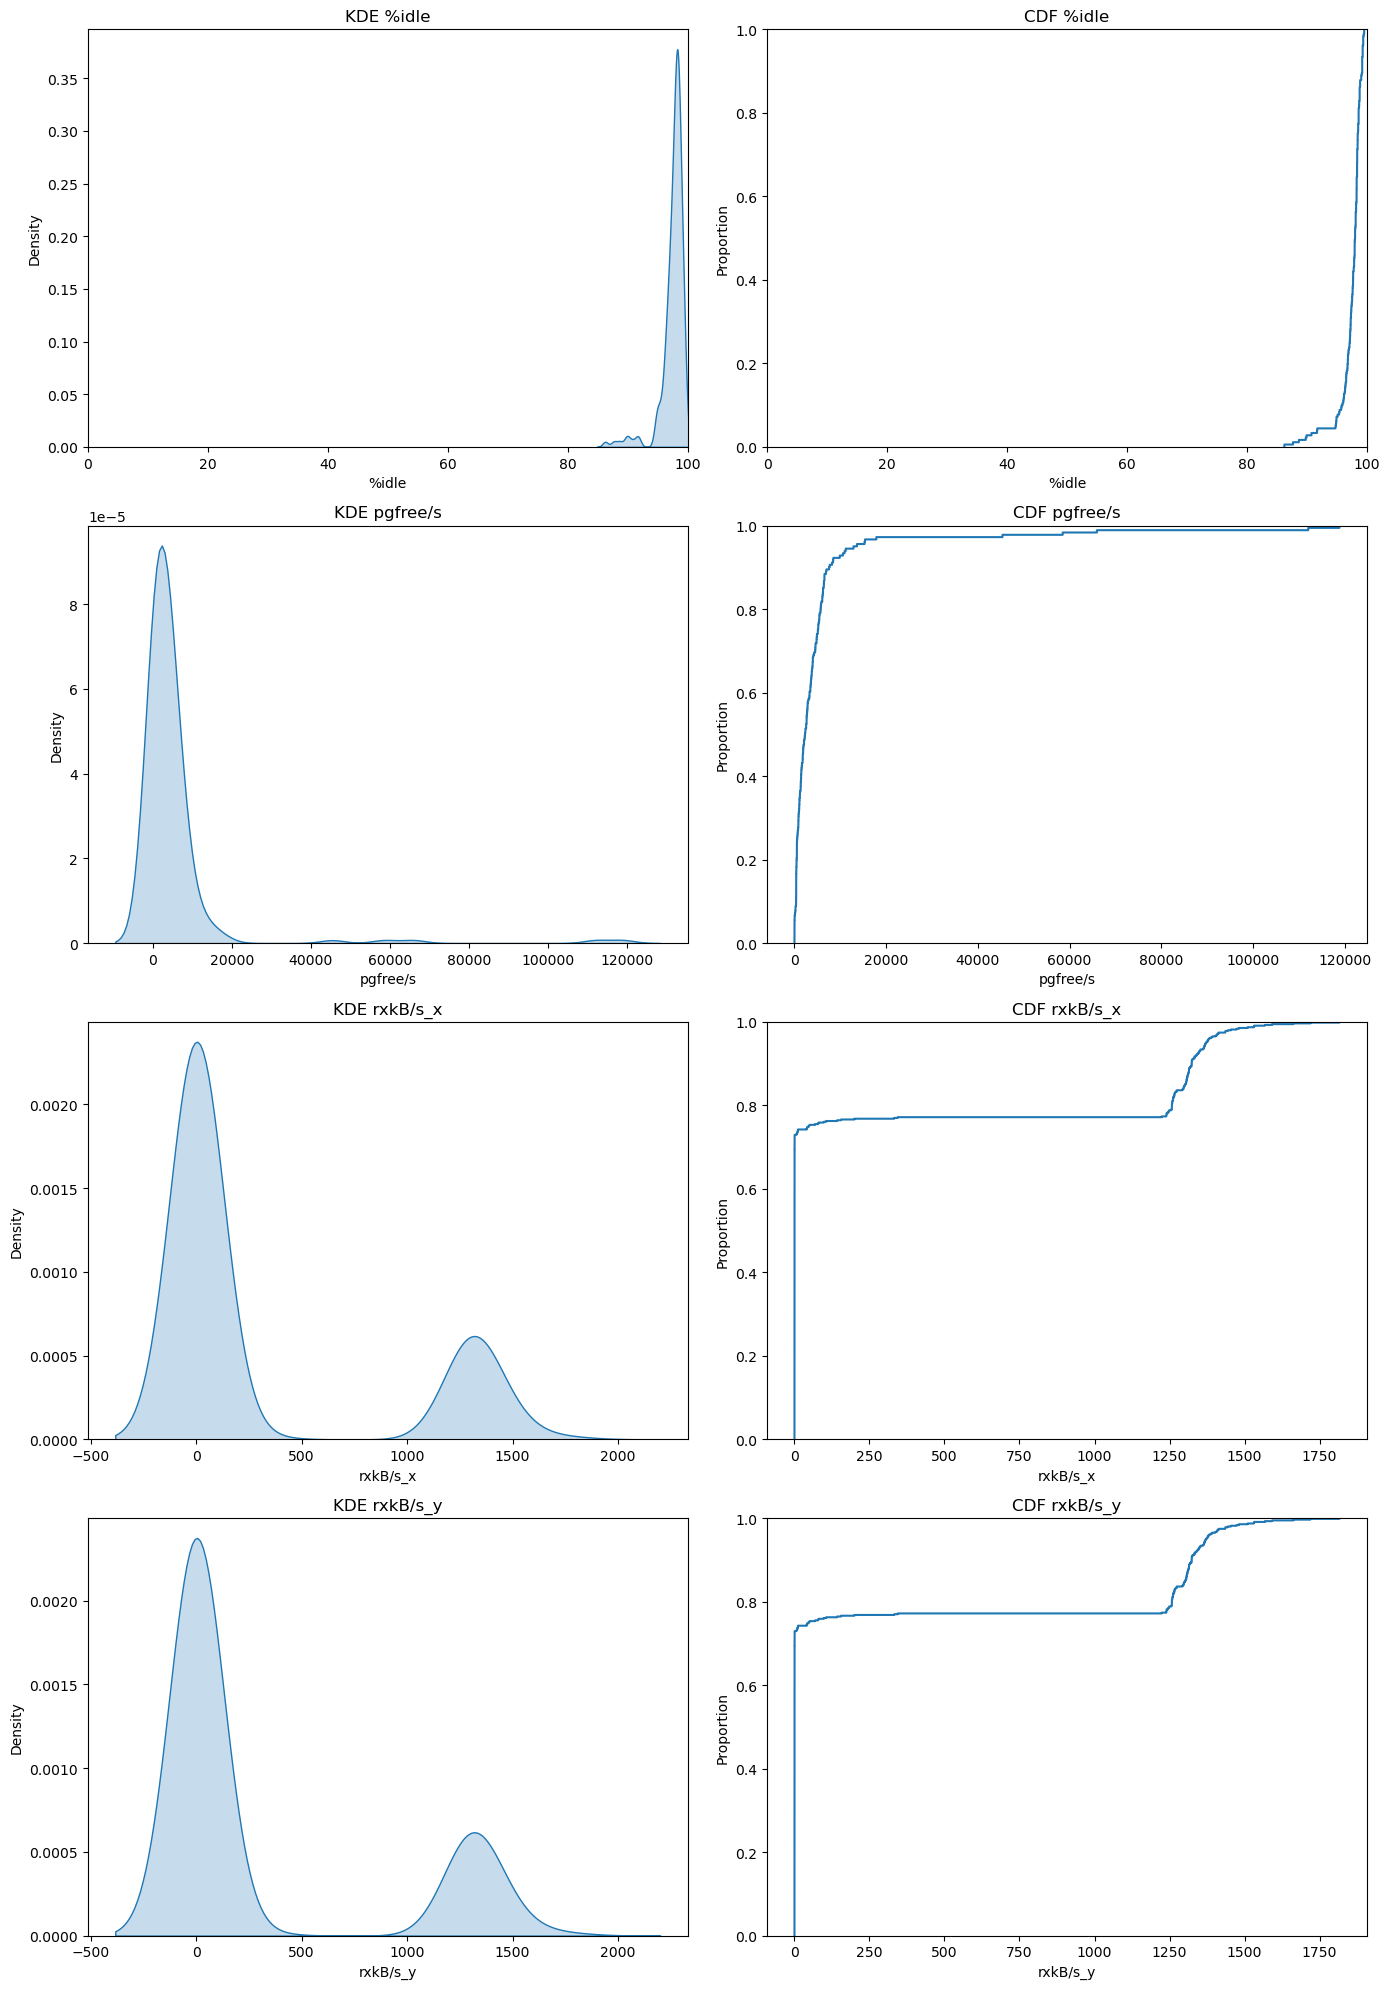

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

columns = ['%idle', 'pgfree/s', 'rxkB/s_x', 'rxkB/s_y']

fig, axes = plt.subplots(len(columns), 2, figsize=(14, len(columns) * 5))

for i, column in enumerate(columns):
    sns.kdeplot(outer_df[column], ax=axes[i, 0], fill=True)
    axes[i, 0].set_title(f"KDE {column}")
    
    sns.ecdfplot(data=outer_df, ax=axes[i, 1], x=column)
    axes[i, 1].set_title(f"CDF {column}")

    if column == '%idle':
        axes[i, 0].set_xlim(0, 100)
        axes[i, 1].set_xlim(0, 100)

plt.tight_layout()
plt.show()